# Hypothesis testing: Binomial distribution<br>Example: Adult persistence of head-turning asymmetry

**References:**
- [Onur Güntürkün: Adult persistence of head-turning asymmetry Nature volume 421, page 711 (13 February 2003)](https://www.nature.com/articles/421711a)
- [MIT 18.650 Statistics for Applications, Fall 2016](https://www.youtube.com/watch?v=VPZD_aij8H0)

**Measurement:**

Observerd kissing couples in public places.
The head-turning behaviour of each couple was recorded for a single kiss, with only the first being counted in instances of multiple kissing.

**Observation:**

Of 124 kissing pairs
- 80 (64.5%) turned their heads to the right
- 44 (35.5%) turned to the left

**Model:**

$X$: number of couples turning their head to the right

\begin{equation}
    X \sim Binom(n,p)
\end{equation}

\begin{equation}
    P(X=k)
    =
    \begin{pmatrix}
        n \\
        k
    \end{pmatrix}
    p^{k}
    (1-p)^{n-k}
\end{equation}

Hypothesis testing

- $H_{0}$: turning left or right is equally probable, there is symmetry in head-turning, $p=0.5$
- $H_{1}$: turning right is preferred, head-turning asymmetry, $p>0.5$

In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_all   = 124
n_right = 80
n_left  = 44

## Probability mass function

In [3]:
ks = np.arange(0,n_all,1)
ps = np.array([scipy.stats.binom.pmf(k,n=n_all, p=0.5) for k in ks])

In [4]:
x = np.linspace(0.0, n_all, 100)
p = 0.5
mean = n_all*p
stdev = np.sqrt(p*(1-p)*n_all)
p_norm = scipy.stats.norm.pdf(x, loc=n_all*p, scale=stdev)

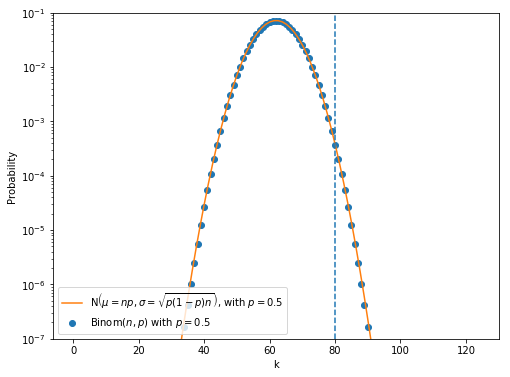

In [5]:
f,a = plt.subplots(figsize=(8,6))
a.scatter(ks,ps, label='Binom$(n,p)$ with $p=0.5$')
a.plot(x,p_norm,c='C1',label=r'N$\left(\mu=n p,\sigma = \sqrt{p(1-p)n}\right)$, with $p=0.5$')
a.set_xlabel('k')
a.set_ylabel('Probability')
a.set_yscale('log')
a.axvline(80,linestyle='--')
a.set_ylim(1e-7,1e-1)
a.legend()

## p-value

**Definition:**
Probability under $H_{0}$ of obtaining a result equal to or more extreme than what was observed

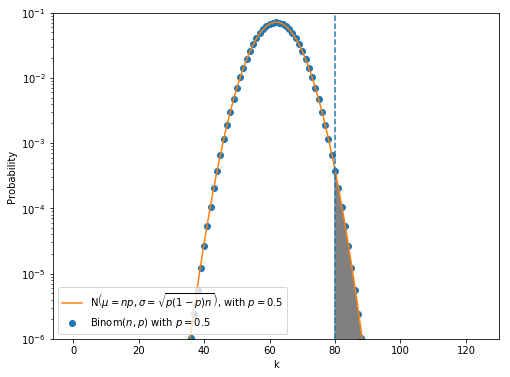

In [6]:
f,a = plt.subplots(figsize=(8,6))
a.scatter(ks,ps, label='Binom$(n,p)$ with $p=0.5$')
a.plot(x,p_norm,c='C1',label=r'N$\left(\mu=n p,\sigma = \sqrt{p(1-p)n}\right)$, with $p=0.5$')
a.set_xlabel('k')
a.set_ylabel('Probability')
a.set_yscale('log')
a.fill_between(ks,ps,where=((ps>=0) & (ks>=80)), color='grey')
a.axvline(80,linestyle='--')
a.set_ylim(1e-6,1e-1)
a.legend()

In [7]:
pval = 1.0 - scipy.stats.binom.cdf(k=n_right-1, n=n_all, p=0.5)
pval

0.00078236701308487255

In [8]:
pval = scipy.stats.binom.cdf(k=n_left, n=n_all, p=0.5)
pval

0.00078236701308483265

### $\chi^{2}(df=1)$ equivalent

In [9]:
chi2_val_for_pval = scipy.stats.chi2.isf(pval,df=1)
chi2_val_for_pval

11.282604917490346

In [15]:
chi2_val_for_pval = scipy.stats.chi2.isf(pval*2.0,df=1)
chi2_val_for_pval

10.000786291187229

In [10]:
x = np.linspace(0.0, 15, 100)
chi2_vals = scipy.stats.chi2.pdf(x, df=1)

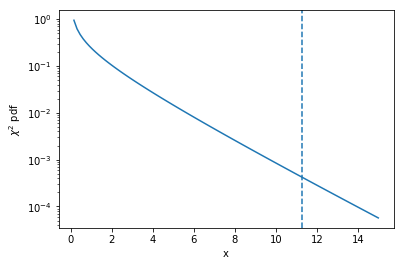

In [11]:
f,a = plt.subplots()
a.plot(x,chi2_vals)
a.axhline(0.0,c='k',linestyle='--')
a.set_xlabel('x')
a.set_ylabel('$\chi^{2}$ pdf')
a.set_yscale('log')
a.axvline(chi2_val_for_pval,linestyle='--')

The article however quotes:
> This roughly 2:1 ratio is significantly different from 50% ( $\chi^{2} = 5.34$, d.f.= 1, P<0.05)

In [12]:
pval_article = 1.0 - scipy.stats.chi2.cdf(x=5.34, df=1)
pval_article

0.020841473072792049

In [13]:
reldiff = np.abs(pval - pval_article)/pval
reldiff

25.638997713637238

In [14]:
epsilon = 1e-1
reldiff < epsilon

False

In [19]:
S = (80-62)**2/62 + (44-62)**2/62
S

10.451612903225806

In [20]:
(80-62)**2/62

5.225806451612903

In [21]:
(44-62)**2/62

5.225806451612903